In [89]:
#P7: Implement k-nearest neighbor algorithm for different values of 'k'. These 'k' values will be given during the time of evaluation.
#Dataset is given below as: 'yeast.data' and description as: 'yeast.names
# Generate a .csv file for model prediction
# Preprocess the given dataset
# Dataset visualization based on classes.
# Visualize the decision boundary for a given value of k.

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load dataset from a local file
dataset=pd.read_csv('yeast.data', sep='\s+')
print(dataset.head(5))

  SequenceName   mcg   gvh   alm   mit  erl pox   vac   nuc Class
0   BAF1_YEAST  0.48  0.45  0.59   0.2  0.5   0  0.58  0.34   NUC
1   ADT3_YEAST  0.64  0.62  0.49  0.15  0.5   0  0.53  0.22   MIT
2   ADT3_YEAST    aa     c    aa     b    z   z    aa    aa   MIT
3   ADT3_YEAST     v     v     e    ee   xx  ww    aa    aa   MIT
4   ADT3_YEAST    ss     c     v     s    a   d     s     s   MIT


In [91]:
# Check the column names in the dataset
print(dataset.columns)


# Drop the 'erl' column from the dataset
dataset = dataset.drop('pox', axis=1)

# Print the updated dataset
print(dataset.head(5))


Index(['SequenceName', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc',
       'Class'],
      dtype='object')
  SequenceName   mcg   gvh   alm   mit  erl   vac   nuc Class
0   BAF1_YEAST  0.48  0.45  0.59   0.2  0.5  0.58  0.34   NUC
1   ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.53  0.22   MIT
2   ADT3_YEAST    aa     c    aa     b    z    aa    aa   MIT
3   ADT3_YEAST     v     v     e    ee   xx    aa    aa   MIT
4   ADT3_YEAST    ss     c     v     s    a     s     s   MIT


In [92]:
import pandas as pd

# List of columns to check for alphabets
columns_to_check = ['mcg', 'gvh', 'alm', 'mit', 'erl', 'vac', 'nuc']

# Define a function to check if a value contains alphabets
def contains_alphabets(value):
    return any(char.isalpha() for char in str(value))

# Use the apply method to create a boolean mask indicating rows with alphabets
mask = dataset[columns_to_check].applymap(contains_alphabets).any(axis=1)

# Keep only rows without alphabets in the specified columns
cleaned_dataset = dataset[~mask]

# Print the cleaned dataset
print(cleaned_dataset.head(5))

  SequenceName   mcg   gvh   alm   mit  erl   vac   nuc Class
0   BAF1_YEAST  0.48  0.45  0.59   0.2  0.5  0.58  0.34   NUC
1   ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.53  0.22   MIT
7   ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.53  0.22   MIT
8   ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.48  0.22   MIT
9   ACE2_YEAST  0.42  0.37  0.59   0.2  0.5  0.52  0.29   NUC


In [93]:
dataset.shape

(1502, 9)

In [94]:
def encode_labels(dataframe, label_column):
    label_encoder = LabelEncoder()
    dataframe[label_column] = label_encoder.fit_transform(dataframe[label_column])
    return dataframe, label_encoder

# The label column name is 'class'
label_column_name = 'Class'

# Encode the labels in the dataset
encoded_dataset, label_encoder = encode_labels(cleaned_dataset, label_column_name)

# Print the first few rows of the encoded dataset
print(encoded_dataset.head(10))


   SequenceName   mcg   gvh   alm   mit  erl   vac   nuc  Class
0    BAF1_YEAST  0.48  0.45  0.59   0.2  0.5  0.58  0.34      7
1    ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.53  0.22      6
7    ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.53  0.22      6
8    ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.48  0.22      6
9    ACE2_YEAST  0.42  0.37  0.59   0.2  0.5  0.52  0.29      7
10   ACE1_YEAST  0.43  0.39  0.54  0.21  0.5  0.53  0.27      7
11   ABP1_YEAST   0.4  0.39   0.6  0.15  0.5  0.58   0.3      0
12   ABF2_YEAST  0.55   0.5  0.66  0.36  0.5  0.49  0.22      6
13   ABC1_YEAST   0.5  0.54  0.48  0.65  0.5  0.53  0.22      6
14   AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.48  0.22      6


/tmp/ipykernel_22910/94288830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[label_column] = label_encoder.fit_transform(dataframe[label_column])


In [95]:
# Split the dataset into training and testing sets
X = encoded_dataset.iloc[:, 1:8].values  # Features
Y = encoded_dataset.iloc[:, 8].values  # Labels
test_size = 0.20
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


In [96]:
Y


array([7, 6, 6, ..., 4, 7, 0])

In [97]:
X

array([['0.48', '0.45', '0.59', ..., '0.5', '0.58', '0.34'],
       ['0.64', '0.62', '0.49', ..., '0.5', '0.53', '0.22'],
       ['0.43', '0.67', '0.48', ..., '0.5', '0.53', '0.22'],
       ...,
       ['0.67', '0.57', '0.36', ..., '0.5', '0.56', '0.22'],
       ['0.43', '0.4', '0.6', ..., '0.5', '0.53', '0.39'],
       ['0.65', '0.54', '0.54', ..., '0.5', '0.53', '0.22']], dtype=object)

In [98]:
X = X.astype(float)

In [99]:
X

array([[0.48, 0.45, 0.59, ..., 0.5 , 0.58, 0.34],
       [0.64, 0.62, 0.49, ..., 0.5 , 0.53, 0.22],
       [0.43, 0.67, 0.48, ..., 0.5 , 0.53, 0.22],
       ...,
       [0.67, 0.57, 0.36, ..., 0.5 , 0.56, 0.22],
       [0.43, 0.4 , 0.6 , ..., 0.5 , 0.53, 0.39],
       [0.65, 0.54, 0.54, ..., 0.5 , 0.53, 0.22]])

In [100]:
# Define the KNN classifier class
class KNearestNeighborsClassifier:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train

    def predict(self, X_test):
        Y_pred = np.zeros(X_test.shape[0])
        for i, x in enumerate(X_test):#
            distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.Y_train[i] for i in k_indices]
            most_common = np.bincount(k_nearest_labels)
            Y_pred[i] = np.argmax(most_common)
        return Y_pred
    
# Initialize the KNN classifier
k = int(input("Enter the value of k: "))
knn = KNearestNeighborsClassifier(k)

# Fit the KNN classifier on the training data
knn.fit(X_train, Y_train)

# Make predictions on the test dataset

predictions = knn.predict(X_test)


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [101]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)


Accuracy: 0.5757575757575758
Confusion Matrix:
 [[58  1  0  0  3  3 30  0  1]
 [ 2  4  0  0  0  2  0  0  0]
 [ 0  1  7  0  0  0  0  0  0]
 [ 1  0  1  3  0  1  0  0  0]
 [ 5  0  0  2 25  0  2  0  0]
 [14  0  0  2  2 30  4  0  0]
 [32  1  0  0  2  8 42  0  0]
 [ 0  0  0  0  0  0  0  2  0]
 [ 3  1  0  0  0  1  1  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.60      0.55        96
           2       0.50      0.50      0.50         8
           3       0.88      0.88      0.88         8
           4       0.43      0.50      0.46         6
           5       0.78      0.74      0.76        34
           6       0.67      0.58      0.62        52
           7       0.53      0.49      0.51        85
           8       1.00      1.00      1.00         2
           9       0.00      0.00      1.00         6

    accuracy                           0.58       297
   macro avg       0.59      0.59      0.70       297
weighte

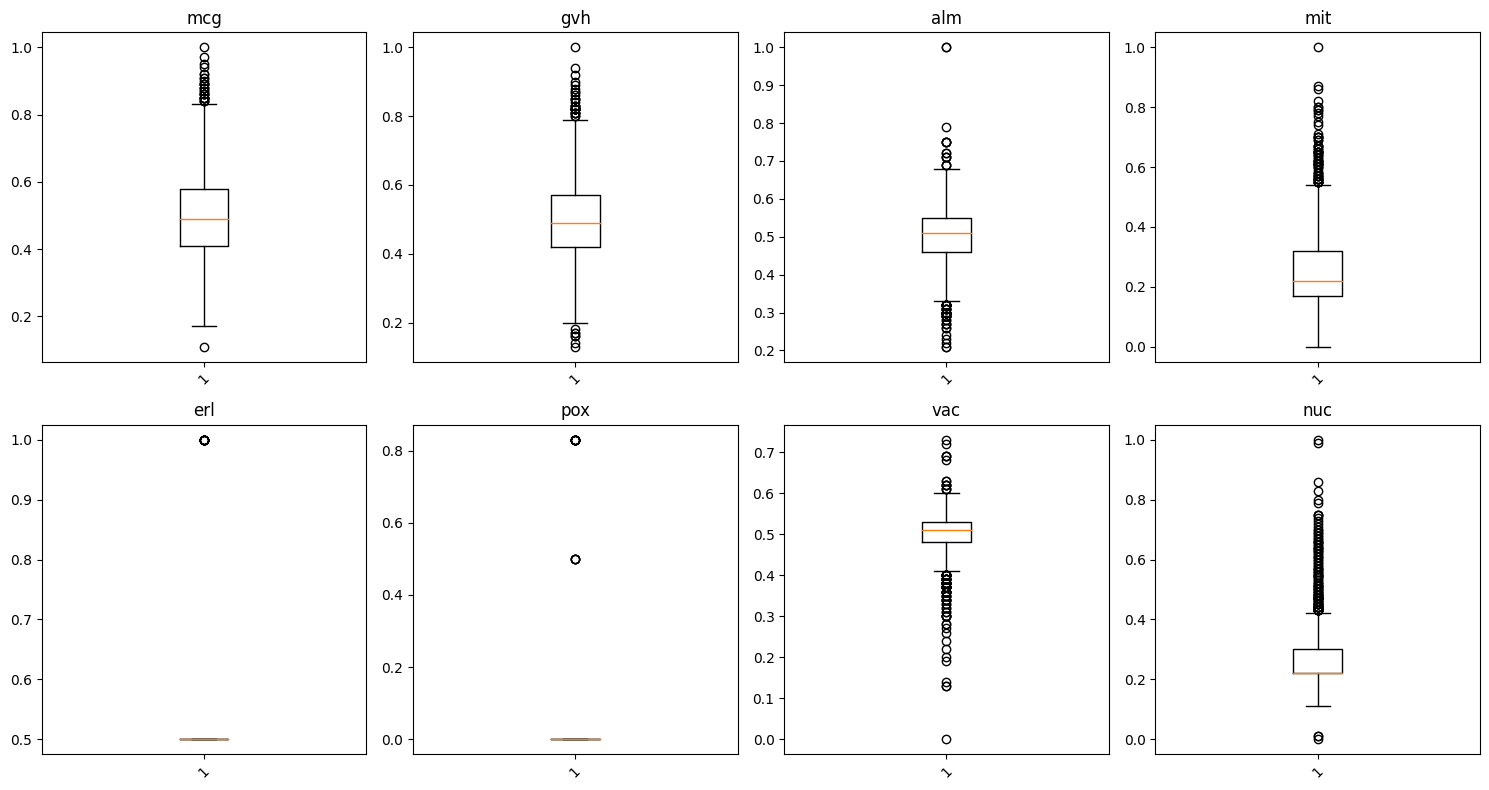

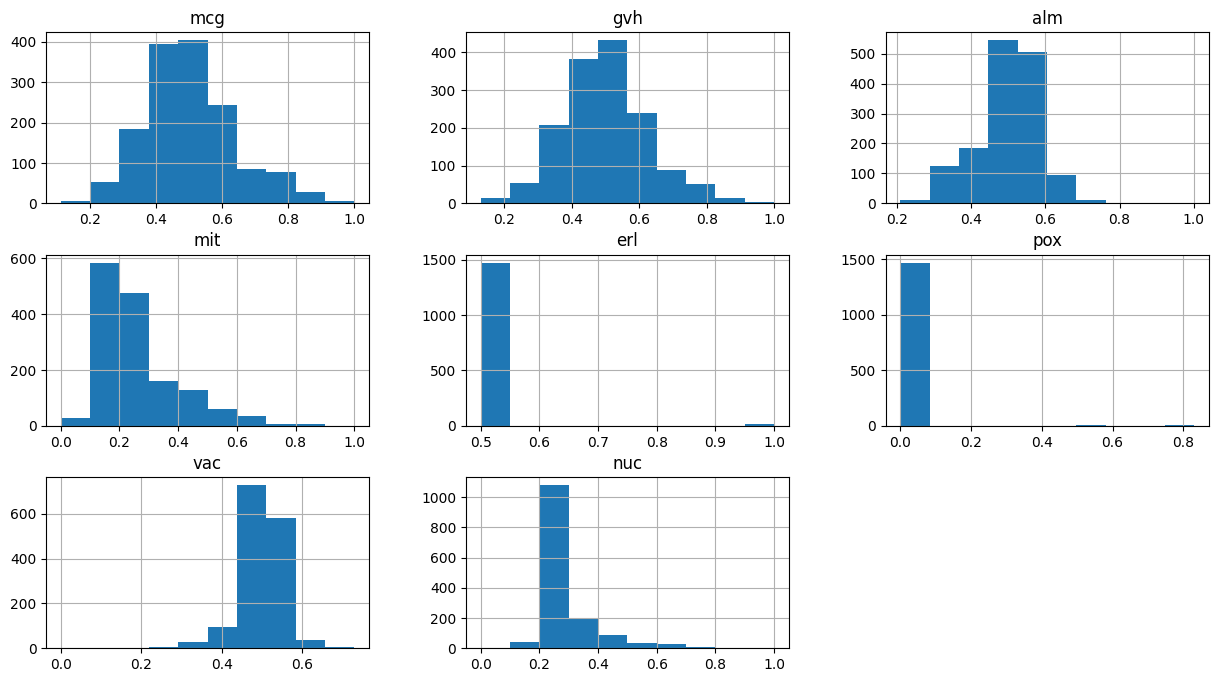

In [ ]:
# Evaluate the KNN model
accuracy = accuracy_score(Y_test, predictions)
confusion = confusion_matrix(Y_test, predictions)
classification_rep = classification_report(Y_test, predictions, zero_division=1)

# Print evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

# Increase the figure size and rotate x-axis labels for box plots
plt.figure(figsize=(15, 8))
for i, column in enumerate(dataset.columns[1:9]):  # Exclude the 'Sequence Name' and 'class' columns
    plt.subplot(2, 4, i + 1)
    plt.boxplot(dataset[column])
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plot histograms for the dataset
dataset.iloc[:, 1:9].hist(figsize=(15, 8))
plt.show()


k = 1 inertia = 0.46464646464646464
k = 2 inertia = 0.4949494949494949
k = 3 inertia = 0.43434343434343436
k = 4 inertia = 0.42087542087542085
k = 5 inertia = 0.42087542087542085
k = 6 inertia = 0.44781144781144777
k = 7 inertia = 0.4040404040404041
k = 8 inertia = 0.44107744107744107
k = 9 inertia = 0.41414141414141414
k = 10 inertia = 0.42087542087542085
k = 11 inertia = 0.40740740740740744
k = 12 inertia = 0.41414141414141414
k = 13 inertia = 0.3939393939393939
k = 14 inertia = 0.3973063973063973
k = 15 inertia = 0.3939393939393939
k = 16 inertia = 0.40740740740740744
k = 17 inertia = 0.39057239057239057
k = 18 inertia = 0.3872053872053872
k = 19 inertia = 0.39057239057239057
k = 20 inertia = 0.3804713804713805


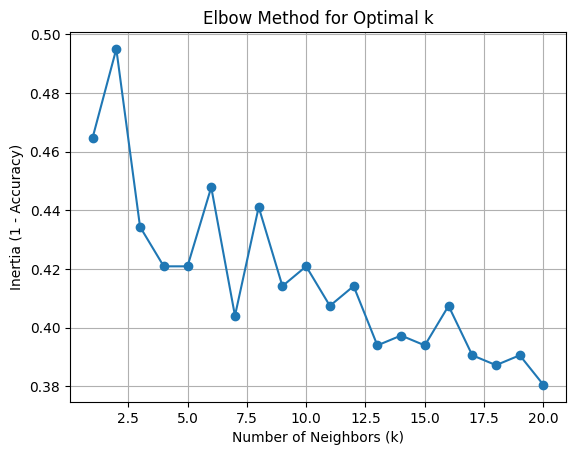

In [102]:
# Initialize an empty list
inertia_values = []


for k in range(1, 21):  # we can adjust the range as needed
    knn = KNearestNeighborsClassifier(k)
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(Y_test, predictions)
    inertia_values.append(1 - accuracy)  # Inertia is 1 - accuracy
    print("k =", k, "inertia =", 1 - accuracy)
# Plot the inertia values for different k values
plt.plot(range(1, 21), inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Inertia (1 - Accuracy)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [106]:
# Split the dataset into training and testing sets
X = dataset[['mcg', 'alm']].values  # Features (using only 'mcg' and 'gvh')
Y = dataset['Class'].values  # Labels
test_size = 0.20
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Initialize the KNN classifier
k = 3
knn = KNearestNeighborsClassifier(k)

# Fit the KNN classifier on the training data
knn.fit(X_train, Y_train)

# Create a mesh grid covering the feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
step_size = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Predict the class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdBu, edgecolor='k')
plt.xlabel('mcg')
plt.ylabel('gvh')
plt.title(f'KNN Decision Boundary (k={k})')
plt.show()

TypeError: '<=' not supported between instances of 'str' and 'float'